In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
%matplotlib inline

  train cut: -7
      train: 135
    binders: 215
non-binders: 47


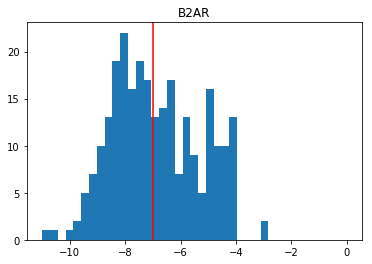

  train cut: -6
      train: 30
    binders: 48
non-binders: 10


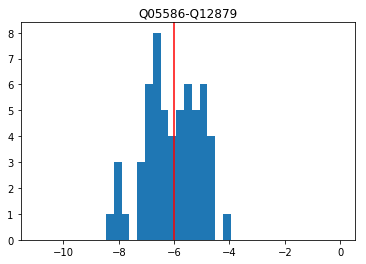

  train cut: -7
      train: 59
    binders: 140
non-binders: 24


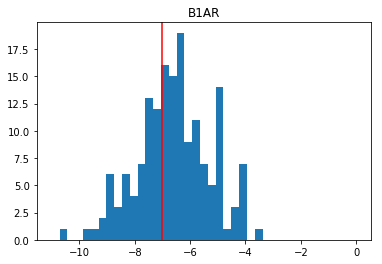

  train cut: -7
      train: 216
    binders: 731
non-binders: 112


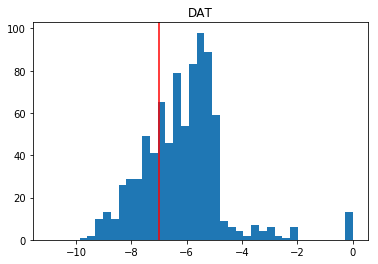

  train cut: -7
      train: 78
    binders: 168
non-binders: 62


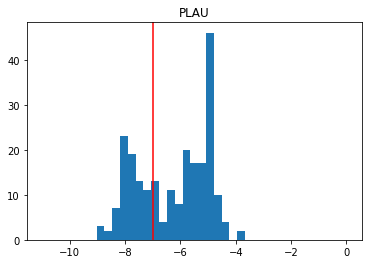

  train cut: -7
      train: 47
    binders: 711
non-binders: 646


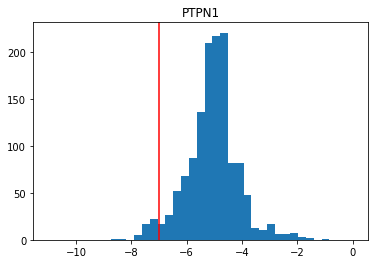

  train cut: -7
      train: 1123
    binders: 2347
non-binders: 443


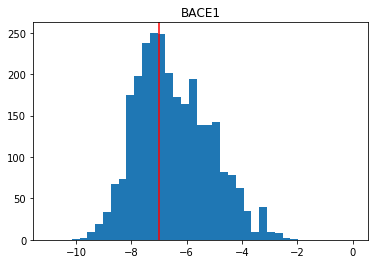

  train cut: -7
      train: 831
    binders: 1272
non-binders: 160


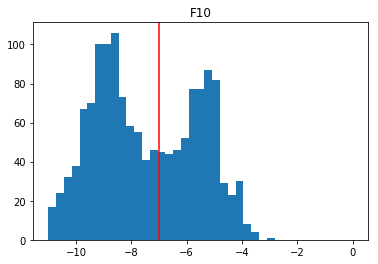

  train cut: -7
      train: 213
    binders: 327
non-binders: 8


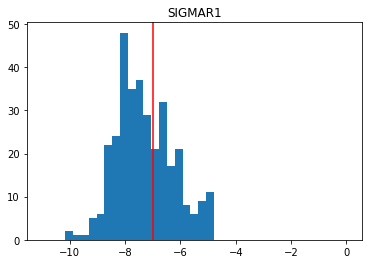

  train cut: -7
      train: 272
    binders: 661
non-binders: 249


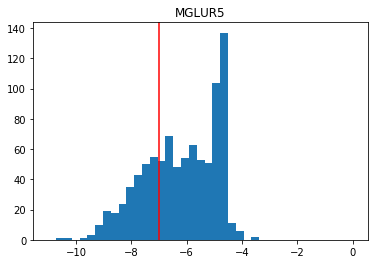

  train cut: -7
      train: 97
    binders: 235
non-binders: 123


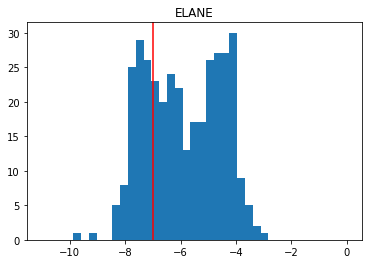

  train cut: -7
      train: 275
    binders: 713
non-binders: 20


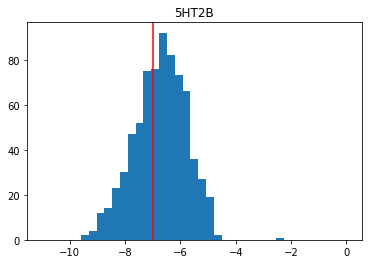

  train cut: -7
      train: 67
    binders: 245
non-binders: 165


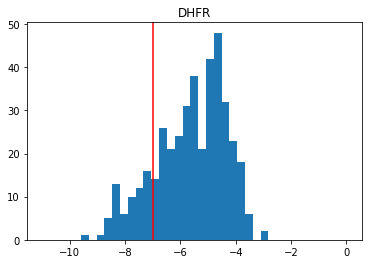

  train cut: -7
      train: 128
    binders: 317
non-binders: 11


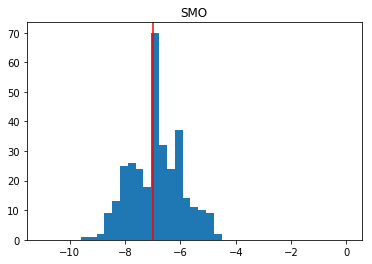

  train cut: -7
      train: 44
    binders: 497
non-binders: 360


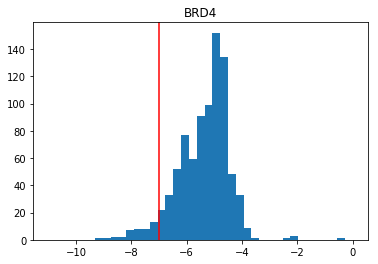

  train cut: -7
      train: 100
    binders: 364
non-binders: 193


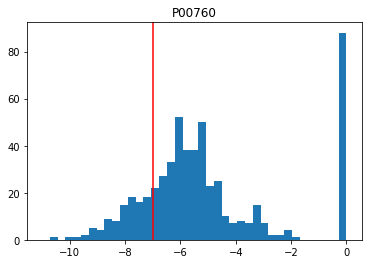

  train cut: -7
      train: 122
    binders: 266
non-binders: 343


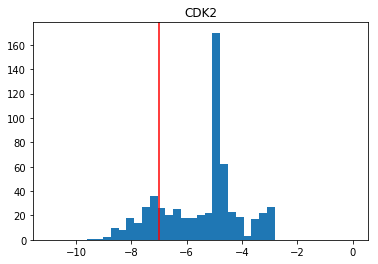

  train cut: -7
      train: 110
    binders: 361
non-binders: 54


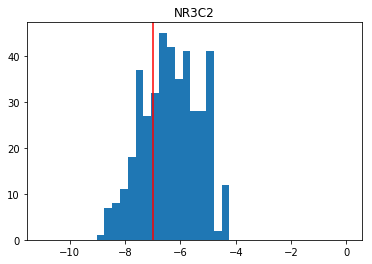

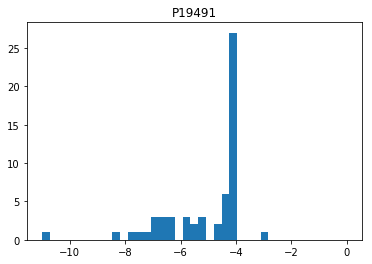

  train cut: -6
      train: 43
    binders: 59
non-binders: 10


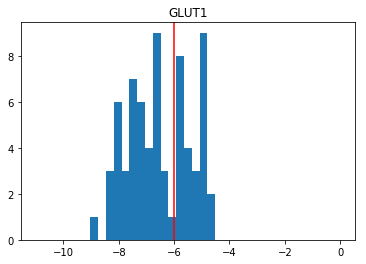

  train cut: -7
      train: 113
    binders: 153
non-binders: 130


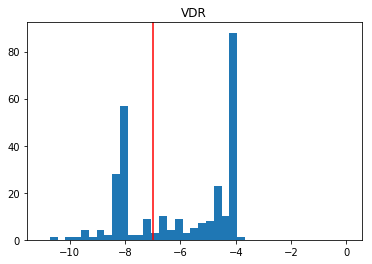

  train cut: -7
      train: 1729
    binders: 2272
non-binders: 77


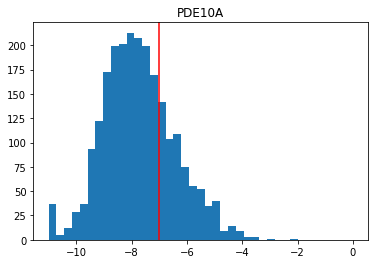

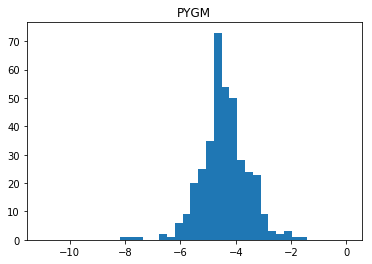

  train cut: -7
      train: 443
    binders: 732
non-binders: 71


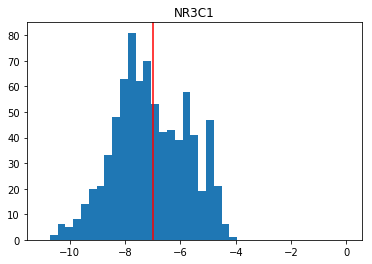

  train cut: -7
      train: 694
    binders: 1367
non-binders: 85


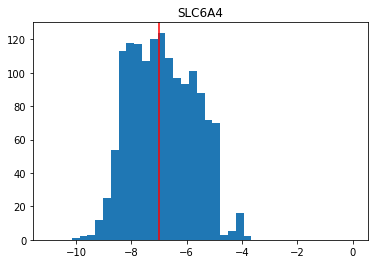

  train cut: -7
      train: 240
    binders: 590
non-binders: 549


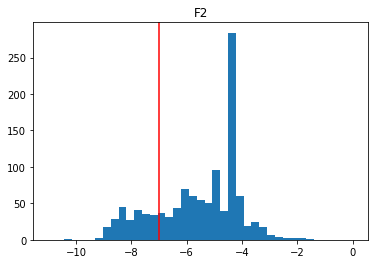

  train cut: -7
      train: 270
    binders: 816
non-binders: 236


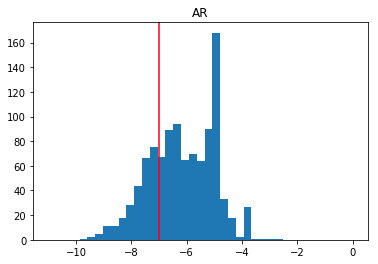

  train cut: -7
      train: 479
    binders: 1150
non-binders: 523


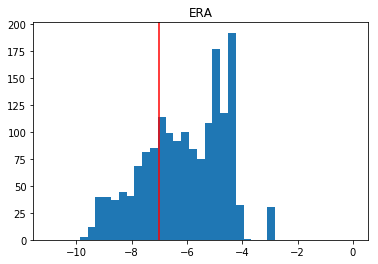

  train cut: -7
      train: 139
    binders: 553
non-binders: 114


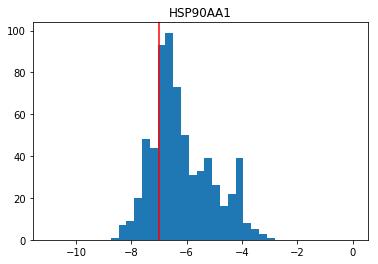

  train cut: -6
      train: 39
    binders: 59
non-binders: 46


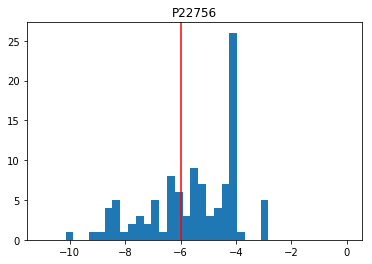

In [2]:
for protein in os.listdir('sherlock/oak/users/jpaggi/VS/CHEMBL'):
    df = pd.read_csv('sherlock/oak/users/jpaggi/VS/CHEMBL/{}/chembl/chosen.csv'.format(protein))
    df['LOGAFFINITY'] = np.log10(df['AFFINITY']) - 9
    df.loc[df['LOGAFFINITY'] > 0] = 0
    df.loc[df['LOGAFFINITY'] < -11] = -11
    plt.hist(df['LOGAFFINITY'], bins=np.linspace(-11, 0, 40))

    for i in [-7, -6]:
        if sum(df['LOGAFFINITY'] <= i) > 30:
            plt.axvline(i, c='r')
            print('  train cut:', i)
            print('      train:', sum(df['LOGAFFINITY'] < i))
            print('    binders:', sum(df['LOGAFFINITY'] < -5))
            print('non-binders:', sum(df['LOGAFFINITY'] >= -5))
            break
    plt.title(protein)
    plt.show()